In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data Merge 

First, we want to merge all the waves into one big dataframe.

In [258]:
Wave1 = pd.read_stata("NIDS-CRAM_Wave1_W1_Anon_V1.1.0.dta")
num_rows_start = Wave1.shape[0]
Wave1 = Wave1[Wave1['w1_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave1.shape[0]
Wave2 = pd.read_stata("NIDS-CRAM_Wave2_Anon_V1.1.0.dta")
num_rows_start = Wave2.shape[0]
Wave2 = Wave2[Wave2['w2_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave2.shape[0]
Wave3 = pd.read_stata("NIDS-CRAM_Wave3_Anon_V1.0.0.dta")
num_rows_start = Wave3.shape[0]
Wave3 = Wave3[Wave3['w3_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave3.shape[0]
frames = [Wave1, Wave2, Wave3]
temp = pd.merge(Wave1, Wave2, how='inner', on='pid')
df = pd.merge(temp, Wave3, how='inner', on='pid')
display(df.head(5))

pid             w1_nc_outcome w1_nc_intrv_c w1_nc_intrv_d w1_nc_intrv_m  \
0  301067  Successfully Interviewed           609          15th           May   
1  301079  Successfully Interviewed           609          22nd           May   
2  301082  Successfully Interviewed           624           4th          June   
3  301086  Successfully Interviewed           644           4th          June   
4  301088  Successfully Interviewed           630          27th           May   

  w1_nc_intrv_y w1_nc_duration w1_nc_dob_m w1_nc_dob_y w1_nc_gen  ...  \
0          2020           15.2        July        1971     Woman  ...   
1          2020          15.37    February        1970     Woman  ...   
2          2020          25.27        June        1989       Man  ...   
3          2020          17.18        June        1972     Woman  ...   
4          2020          21.13         May        1978       Man  ...   

  w3_nc_smkprice_ld w3_nc_smkbrand_ld w3_nc_smkbrand_ld_o w3_nc_smkcigday  \
0               NaN               NaN                                 NaN   
1               NaN               NaN                                 NaN   
2               NaN               NaN                                 NaN   
3               NaN               NaN                                 NaN   
4               NaN               NaN                                 NaN   

  w3_nc_smkbrand_after w3_nc_smkbrand_after_o w3_nc_intres w3_nc_intlng1  \
0                  NaN                            Friendly        Sepedi   
1                  NaN                            Friendly        Sepedi   
2                  NaN                            Friendly      IsiXhosa   
3                  NaN                            Friendly       IsiZulu   
4                  NaN                             Hostile      IsiXhosa   

  w3_nc_intlng2 w3_nc_intlng3  
0           NaN           NaN  
1       Sesotho           NaN  
2           NaN           NaN  
3           NaN           NaN  
4       English           NaN  

[5 rows x 522 columns]

## Impact Of Covid-19 on Social Welfare of SA During the First Wave 

Pick columns that will give very useful insights into the **welfare** of South Africans.

**(1) w1_nc_uneminc_uif** : Did you receive the UIF reduced work time benefit in April?

**(2) w1_nc_incgov** : Do you receive any kind of government grant?

**(3.1) w1_nc_incgovtyp1** : Government grant received? 1

**(3.2) w1_nc_incgovtyp2** : Government grant received? 2

**(3.3) w1_nc_incgovtyp3** : Government grant received? 3

**(4.1) w1_nc_hhincsrc1** :Sources household income in February? 1	

**(4.2) w1_nc_hhincsrc2** : Sources household income in February? 2	

**(4.3) w1_nc_hhincsrc3** : Sources household income in February? 3	

**(5.1) w1_nc_hhincdec1** : Sources of household income decreased during lockdown? 1

**(5.2) w1_nc_hhincdec2** : Sources of household income decreased during lockdown? 2	

**(5.3) w1_nc_hhincdec3** : Sources of household income decreased during lockdown? 3	

**(6) w1_nc_hhincchng** : Has household lost main source of income since lockdown start 27th Mar

Due to the mandated lockdown of 27 March 2020, many people were not able to go to work. The South African government stated that it would make available a UIF reduced work-time benefit in April. When participants in the sample space were asked if they received the UIF benefit in April, their responses were as follows:

Did You Receive A UIF Reduced Work-Time Benefit in April?


No     1164
Yes      86
Name: w1_nc_uneminc_uif, dtype: int64

Text(0, 0.5, 'Proportion')

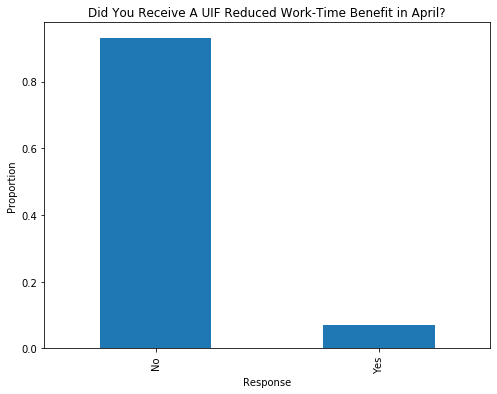

In [259]:
def replace(x):
    if x == "Other" or x == "Don't know" or x == "Refused" or x=='Missing' or x== "Don't Know":
        return np.NaN
    return x

df['w1_nc_uneminc_uif'] = df['w1_nc_uneminc_uif'].apply(replace)
df = df[df['w1_nc_uneminc_uif'].notna()]
df_UIF = df['w1_nc_uneminc_uif'].value_counts() #Get the count of people that responded to the question.
print("Did You Receive A UIF Reduced Work-Time Benefit in April?")
display(df_UIF)

df_UIF = df['w1_nc_uneminc_uif'].value_counts()/df_UIF.sum()
plt.figure(figsize=(8,6))
df_UIF.plot(kind='bar');
plt.title("Did You Receive A UIF Reduced Work-Time Benefit in April?");
plt.xlabel("Response"); plt.ylabel("Proportion")

Only 6.8% of participants recieved the UIF reduced work time benefit in April. This warrants further investigation of grants given to participants from the government during the first wave.

Do You Receive Any Kind of Grant from the Government?


No     1031
Yes     217
Name: w1_nc_incgov, dtype: int64

What Grant Did You Receive from the Government?


Child Support Grant (CSG)                        137
Old Age Pension Grant (OAP)                       47
Disability Grant                                  27
Other (specify)                                    7
Foster Child Grant                                 7
R350 COVID-19 Social Relief of Distress Grant      6
Social relief or distress grant                    4
Care Dependency Grant                              1
dtype: int64

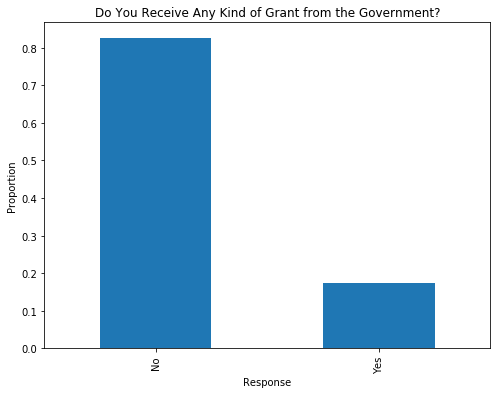

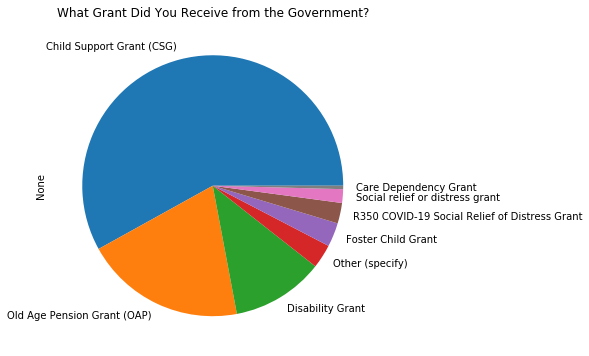

In [260]:
# Bar Graph
df['w1_nc_incgov'] = df['w1_nc_incgov'].apply(replace)
df = df[df['w1_nc_incgov'].notna()]
df_grants = df['w1_nc_incgov'].value_counts() #Get the count of people that responded to the question.
print('Do You Receive Any Kind of Grant from the Government?')
display(df_grants)
df_grants = df['w1_nc_incgov'].value_counts()/df_grants.sum()
plt.figure(figsize=(8,6))
df_grants.plot(kind='bar');
plt.title("Do You Receive Any Kind of Grant from the Government?");
plt.xlabel("Response"); plt.ylabel("Proportion")

# Pie Chart
df_grant_received1 = df['w1_nc_incgovtyp1']; df_grant_received2 = df['w1_nc_incgovtyp2']; df_grant_received3 = df['w1_nc_incgovtyp3'];
df_grant_received = df_grant_received1.append(df_grant_received2).append(df_grant_received3)
df_grant_received.apply(replace); df_grant_received.notna();
df_grant_receieved = df_grant_received.value_counts() #Get the count of people that responded to the question.
print('What Grant Did You Receive from the Government?')
display(df_grant_receieved)
df_grant_received = df_grant_received.value_counts()
plt.figure(figsize=(8,6))
df_grant_received.plot(kind='pie');
plt.title("What Grant Did You Receive from the Government?");

Only 17% of participants received grants from the government. 
Furthermore, 51% of the grants that participants received were in the form of child grants. Only 2.5% was from the COVID-19 Social Relief of Distress Grant.

Let's have a look at how the participant's primary source of income was affected during the first wave.

What Is Your primary Source of Income?


Government grants                      704
Income from employment                 378
Money from friends or family           188
Household had no income in February    106
Income from a business                  84
Other (specify)                         33
dtype: int64

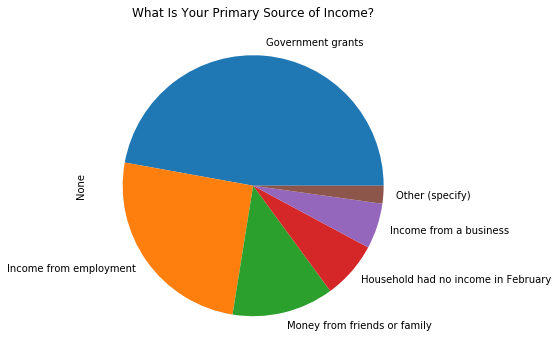

In [261]:
# Pie Chart
df_src_income1 = df['w1_nc_hhincsrc1']; df_src_income2 = df['w1_nc_hhincsrc2']; df_src_income3 = df['w1_nc_hhincsrc3'];
df_src_income = df_src_income1.append(df_src_income2).append(df_src_income3)
df_src_income = df_src_income.apply(replace)
df_src_income.notna();
df_src_income = df_src_income.value_counts() #Get the count of people that responded to the question.
print('What Is Your primary Source of Income?')
display(df_src_income)
plt.figure(figsize=(10,6))
df_src_income.plot(kind='pie');
plt.title("What Is Your Primary Source of Income?");

Over 47% of participants depend on government grants as a form of income, yet only about 17% of the people actually received grants from the government, and of that 17%, 51% recieved them as child grants. It seems like the only way you could've made an income during this time was to have a child that paid through grants.

Has Your Household Lost Its Main Source of Income Since Lockdown Start?


Yes    647
No     580
Name: w1_nc_hhincchng, dtype: int64

Has Your Household Lost Its Main Source of Income Since Lockdown Start?


No income source has decreased             464
Income from employment                     280
Household had no income before lockdown    152
Government grants                          141
Money from friends or family                98
Income from a business                      86
Other (specify)                             17
dtype: int64

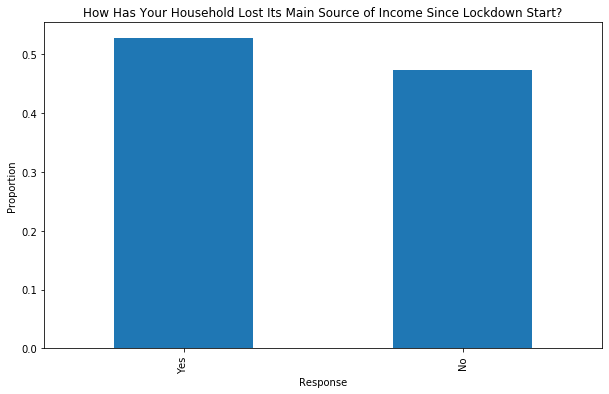

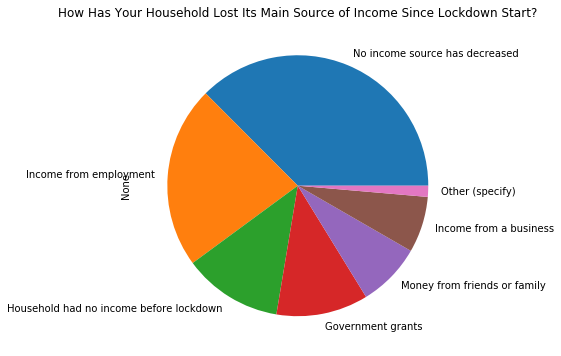

In [262]:
#Bar graph
df['w1_nc_hhincchng'] = df['w1_nc_hhincchng'].apply(replace)
df = df[df['w1_nc_hhincchng'].notna()]
df_lost_income = df['w1_nc_hhincchng'].value_counts() #Get the count of people that responded to the question.
print("Has Your Household Lost Its Main Source of Income Since Lockdown Start?")
display(df_lost_income)
df_lost_income = df['w1_nc_hhincchng'].value_counts()/df_lost_income.sum()
plt.figure(figsize=(10,6))
df_lost_income.plot(kind='bar');
plt.title("How Has Your Household Lost Its Main Source of Income Since Lockdown Start?");
plt.xlabel("Response"); plt.ylabel("Proportion")

# Pie Chart
df_decrease1 = df['w1_nc_hhincdec1']; df_decrease2 = df['w1_nc_hhincdec2']; df_decrease3 = df['w1_nc_hhincdec3'];
df_decrease = df_decrease1.append(df_decrease2).append(df_decrease3)
df_decrease = df_decrease.apply(replace); 
df_decrease.notna();
print('Has Your Household Lost Its Main Source of Income Since Lockdown Start?')
df_decrease = df_decrease.value_counts() #Get the count of people that responded to the question.
display(df_decrease)
plt.figure(figsize=(10,6))
df_decrease.plot(kind='pie');
plt.title("How Has Your Household Lost Its Main Source of Income Since Lockdown Start?");

Over 50% of participants lost their main source of income during the first wave, and 22% of that was due to people losing their job. 11% of the 50% was due to people no longer receiving government grants. 

It is thus evident that participants social welfare was impacted during the first wave. Participants not only lost their jobs, but they didn't receive grants and welfare from the state, which a lot of them depended on. 

## Impact Of Covid-19 on Social Welfare of SA During the Second Wave

Pick columns that will give very useful insights into the welfare of South Africans.

**(1) w2_nc_unemincuifany_june** : Did you receive any UIF benefit in June?

**(2) w2_nc_incvgrt** : Did you apply for the Special Covid-19 Relief from distress Grant?

**(3) w2_nc_incgov_june** : Did you personally receive any kind of government grant in June?

**(3.1) w2_nc_incgovtyp1** : Government grant received?1

**(3.2) w2_nc_incgovtyp2** : Government grant received?2

**(3.3) w2_nc_incgovtyp3** : Government grant received?3

**(3.4) w2_nc_incgovtyp4** : Government grant received?4

**(4.1) w2_nc_hhincsrc1** :Sources household income in June?1

**(4.2) w2_nc_hhincsrc2** : Sources household income in June?2

**(4.3) w2_nc_hhincsrc3** : Sources household income in June?3

**(4.4) w2_nc_hhincsrc4** : Sources household income in June?4

**(5) w2_nc_hhincchnged** :	In the past 4 weeks, has this main income source changed?

Again, we take a look at the portion of participants that received UIF benefits. In this wave, we take explore that a little bit further we check to see what portion of participants applied for the Special Covid-19 Relief From Distress Grant, which was announced after the lockdown was initiated. And we see who actually received it. 

Did You Receive Any UIF Benefits in June?


No     706
Yes     48
Name: w2_nc_unemincuifany_june, dtype: int64

Did You Apply for the Special Covid-19 Relief from Distress Grant?


No never applied                     378
Yes applied - application pending    142
Yes applied - yes successful         127
Yes applied - not successful         105
Name: w2_nc_incvgrt, dtype: int64

Text(0, 0.5, 'Proportion')

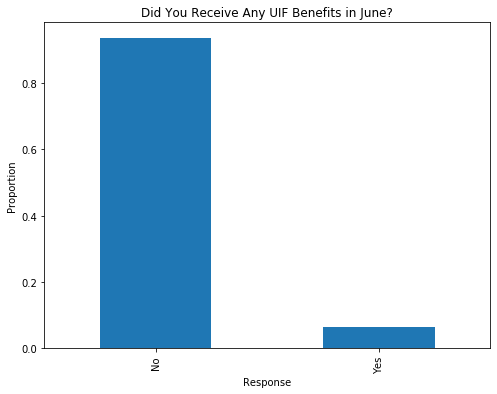

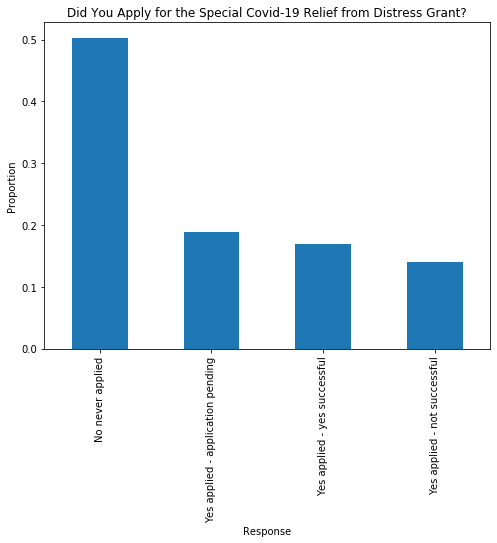

In [263]:
# UIF Benefits in June
df['w2_nc_unemincuifany_june'] = df['w2_nc_unemincuifany_june'].apply(replace)
df = df[df['w2_nc_unemincuifany_june'].notna()]
df_UIF_June = df['w2_nc_unemincuifany_june'].value_counts() #Get the count of people that responded to the question.
print("Did You Receive Any UIF Benefits in June?")
display(df_UIF_June)

df_UIF_June = df['w2_nc_unemincuifany_june'].value_counts()/df_UIF_June.sum()
plt.figure(figsize=(8,6))
df_UIF_June.plot(kind='bar');
plt.title("Did You Receive Any UIF Benefits in June?");
plt.xlabel("Response"); plt.ylabel("Proportion")

# Special Covid-19 Relief from Distress Grant
df['w2_nc_incvgrt'] = df['w2_nc_incvgrt'].apply(replace)
df = df[df['w2_nc_incvgrt'].notna()]
df_Covid_relief = df['w2_nc_incvgrt'].value_counts() #Get the count of people that responded to the question.
print("Did You Apply for the Special Covid-19 Relief from Distress Grant?")
display(df_Covid_relief)

df_Covid_relief = df['w2_nc_incvgrt'].value_counts()/df_Covid_relief.sum()
plt.figure(figsize=(8,6))
df_Covid_relief.plot(kind='bar');
plt.title("Did You Apply for the Special Covid-19 Relief from Distress Grant?");
plt.xlabel("Response"); plt.ylabel("Proportion")

Similarly as in the first wave, only 6.25% of participants actually received any UIF benefits in June. Only about 18% of participants received the applied actually received the Special Covid-19 Relief from Distress Grant.

Did You Personally Receive Any kind of Government Grant in June?


No     419
Yes    333
Name: w2_nc_incgov_june, dtype: int64

What Grant Did You Receive from the Government?


Child Support Grant (CSG)                        202
R350 COVID-19 Social Relief of Distress Grant     94
Foster Child Grant                                16
Disability Grant                                  14
Old Age Pension Grant (OAP)                        9
NSFAS                                              4
Care Dependency Grant                              3
Other (specify)                                    3
Grant in aid                                       2
dtype: int64

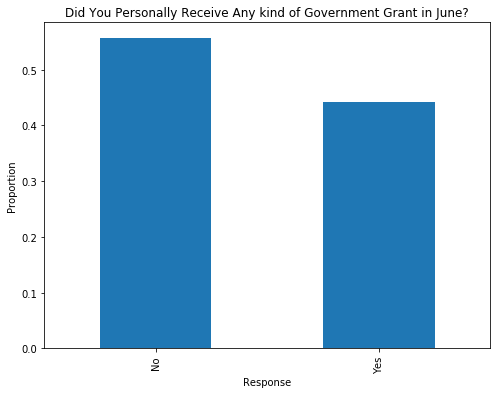

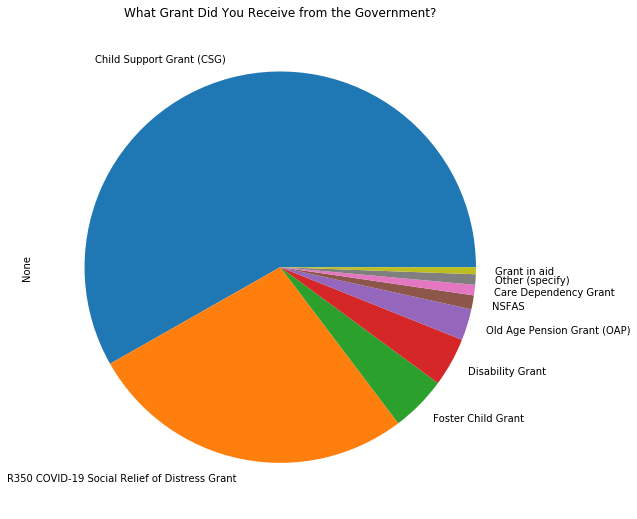

In [264]:
#Grant received in June
df['w2_nc_incgov_june'] = df['w2_nc_incgov_june'].apply(replace)
df = df[df['w2_nc_incgov_june'].notna()]
df_grant_June = df['w2_nc_incgov_june'].value_counts() #Get the count of people that responded to the question.
print("Did You Personally Receive Any kind of Government Grant in June?")
display(df_grant_June)

df_grant_June = df['w2_nc_incgov_june'].value_counts()/df_grant_June.sum()
plt.figure(figsize=(8,6))
df_grant_June.plot(kind='bar');
plt.title("Did You Personally Receive Any kind of Government Grant in June?");
plt.xlabel("Response"); plt.ylabel("Proportion")


# Kind of grants received in June
df_grant1 = df['w2_nc_incgovtyp1'];df_grant2 = df['w2_nc_incgovtyp2'];
df_grant3 = df['w2_nc_incgovtyp3'];df_grant4 = df['w2_nc_incgovtyp4'];
df_grant = df_grant1.append(df_grant2).append(df_grant3).append(df_grant4)
df_grant = df_grant.apply(replace)
df_grant.notna();
df_grant = df_grant.value_counts() #Get the count of people that responded to the question.
print('What Grant Did You Receive from the Government?')
display(df_grant)
plt.figure(figsize=(10,9))
df_grant.plot(kind='pie');
plt.title("What Grant Did You Receive from the Government?");

Participants that received grants from the government increased by 38% in the second wave. This could be because the government had more time and resources to allocate grants for participants. This is seen by the COVID-19 Social Relief of Distress Grant being the second most received grant at 27%. Child support grants remain the most grant received at 58% of grants received. 

Let's have a look at how the participant's primary source of income was affected during the second wave.

What Was Your Primary Source of Income in June?


Government grants                  530
Money from friends or family       122
Income from employment              89
Household had no income in June     63
Income from a business              19
Pension                             17
Other (specify)                      6
dtype: int64

In the Past 4 Weeks, How Has This Main Income Source Changed?


Stayed the same    271
Increased          265
Decreased          106
Name: w2_nc_hhincchnged, dtype: int64

Text(0, 0.5, 'Proportion')

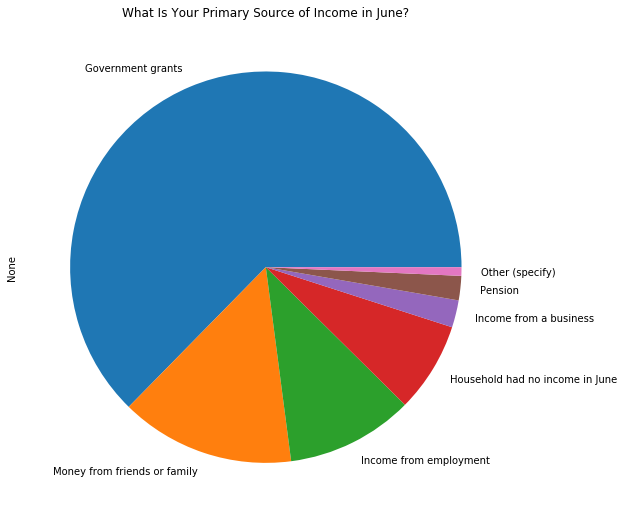

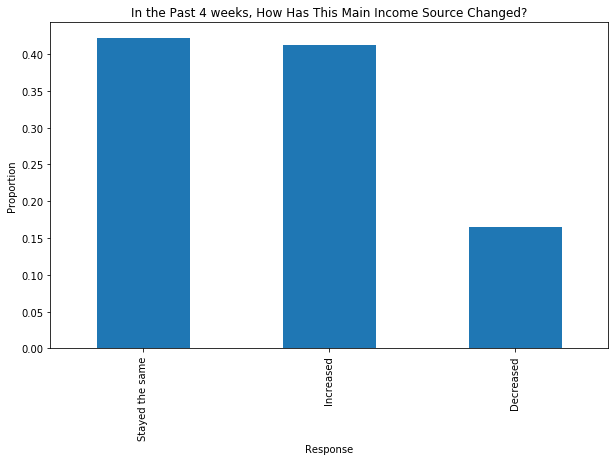

In [265]:
# Source of Income
df_src_income1 = df['w2_nc_hhincsrc1']; df_src_income2 = df['w2_nc_hhincsrc2']; 
df_src_income3 = df['w2_nc_hhincsrc3']; df_src_income4 = df['w2_nc_hhincsrc4'];
df_src_income = df_src_income1.append(df_src_income2).append(df_src_income3).append(df_src_income4)
df_src_income = df_src_income.apply(replace)
df_src_income.notna();
df_src_income = df_src_income.value_counts() #Get the count of people that responded to the question.
print('What Was Your Primary Source of Income in June?')
display(df_src_income)
plt.figure(figsize=(10,9))
df_src_income.plot(kind='pie');
plt.title("What Is Your Primary Source of Income in June?");


#Change in Source of Income
df['w2_nc_hhincchnged'] = df['w2_nc_hhincchnged'].apply(replace); 
df = df[df['w2_nc_hhincchnged'].notna()]
df_decrease = df['w2_nc_hhincchnged'].value_counts() #Get the count of people that responded to the question.
print('In the Past 4 Weeks, How Has This Main Income Source Changed?')
display(df_decrease)
df_decrease = df['w2_nc_hhincchnged'].value_counts()/df_decrease.sum()
plt.figure(figsize=(10,6))
df_decrease.plot(kind='bar');
plt.title("In the Past 4 weeks, How Has This Main Income Source Changed?");
plt.xlabel("Response"); plt.ylabel("Proportion")

Again, government grants were the primary source of income for most participants standing at 62% (a 15% increase from the first wave). Income from employment decreased by 14% from the first wave. This could possibly be from the fact that many people lost their jobs in the first wave. 

In addition, 83% of participant's incomes either increased or remained the same in the second wave. 
Since the participant's in this study's incomes depended heavily on grants, we can say that their incomes (welfare) improved during the second wave, because the government was better prepared and more efficient at rolling out grants in the second wave than they were in the first.

## Impact Of Covid-19 on Social Welfare of SA During the Third Wave

Pick columns that will give very useful insights into the welfare of South Africans.


**(1) w3_nc_unemincuifany_oct** : Did you receive any UIF benefit in October?

**(2) w3_nc_incvgrt** : Did you apply for the Special Covid-19 Relief from distress Grant?

**(3) w3_nc_incgov_oct** : Did you personally receive any kind of government grant in October?

**(3.1) w3_nc_incgovtyp1** : Government grant received?1

**(3.2) w3_nc_incgovtyp2** : Government grant received?2

**(3.3) w3_nc_incgovtyp3** : Government grant received?3

**(3.4) w3_nc_incgovtyp4** : Government grant received?4

**(4.1) w3_nc_hhincsrc1** :Sources household income in October?1

**(4.2) w3_nc_hhincsrc2** : Sources household income in October?2

**(4.3) w3_nc_hhincsrc3** : Sources household income in October?3

**(4.4) w3_nc_hhincsrc4** : Sources household income in October?4

**(5) w3_nc_hhincchnged** :	In the past 4 weeks, has this main income source changed?


As in the second wave, we take a look at the portion of participants that received UIF benefits. Again we also explore to see what portion of participants applied for the Special Covid-19 Relief From Distress Grant.

Did You Receive Any UIF Benefits in October?


No     342
Yes     17
Name: w3_nc_unemincuifany_oct, dtype: int64

Did You Apply for the Special Covid-19 Relief from Distress Grant?


No never applied                     208
Yes applied - yes successful          80
Yes applied - not successful          58
Yes applied - application pending     13
Name: w3_nc_incvgrt, dtype: int64

Text(0, 0.5, 'Proportion')

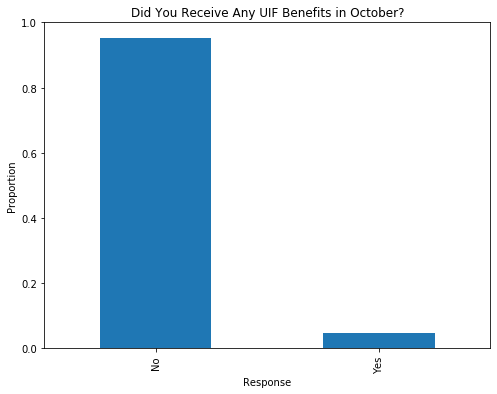

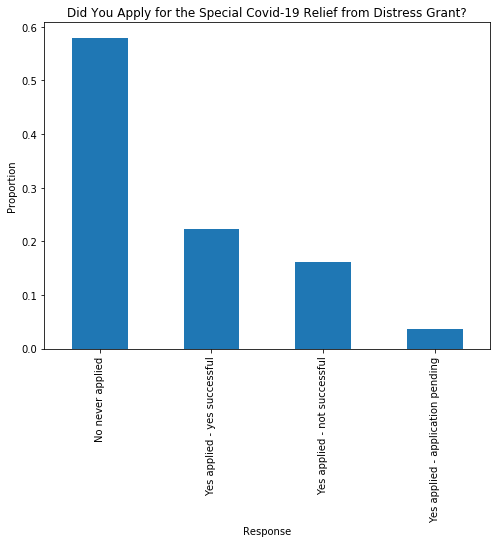

In [266]:
# UIF Benefits in October
df['w3_nc_unemincuifany_oct'] = df['w3_nc_unemincuifany_oct'].apply(replace)
df = df[df['w3_nc_unemincuifany_oct'].notna()]
df_UIF_Oct = df['w3_nc_unemincuifany_oct'].value_counts() #Get the count of people that responded to the question.
print("Did You Receive Any UIF Benefits in October?")
display(df_UIF_Oct)

df_UIF_Oct = df['w3_nc_unemincuifany_oct'].value_counts()/df_UIF_Oct.sum()
plt.figure(figsize=(8,6))
df_UIF_Oct.plot(kind='bar');
plt.title("Did You Receive Any UIF Benefits in October?");
plt.xlabel("Response"); plt.ylabel("Proportion")

# Special Covid-19 Relief from Distress Grant
df['w3_nc_incvgrt'] = df['w3_nc_incvgrt'].apply(replace)
df = df[df['w3_nc_incvgrt'].notna()]
df_Covid_relief = df['w3_nc_incvgrt'].value_counts() #Get the count of people that responded to the question.
print("Did You Apply for the Special Covid-19 Relief from Distress Grant?")
display(df_Covid_relief)

df_Covid_relief = df['w3_nc_incvgrt'].value_counts()/df_Covid_relief.sum()
plt.figure(figsize=(8,6))
df_Covid_relief.plot(kind='bar');
plt.title("Did You Apply for the Special Covid-19 Relief from Distress Grant?");
plt.xlabel("Response"); plt.ylabel("Proportion")

Even less participants received UIF benefits in the third wave at 4.7%, despite more people having lost their jobs during October. 22% of participants received the Special Covid-19 Relief from Distress Grant, and this is a 4% increase from the second wave.

Did You Personally Receive Any kind of Government Grant in October?


Yes    195
No     164
Name: w3_nc_incgov_oct, dtype: int64

What Grant Did You Receive from the Government?


Child Support Grant (CSG)                        109
R350 COVID-19 Social Relief of Distress Grant     76
Foster Child Grant                                11
Care Dependency Grant                              3
Old Age Pension Grant (OAP)                        3
Disability Grant                                   2
NSFAS                                              1
dtype: int64

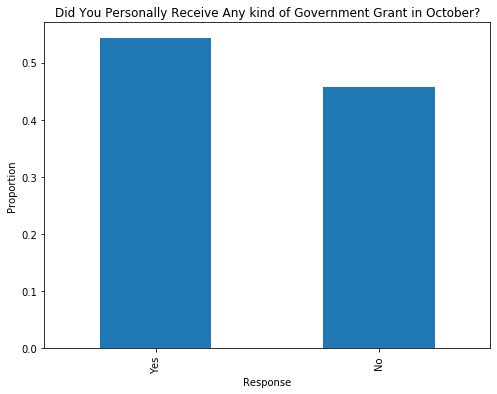

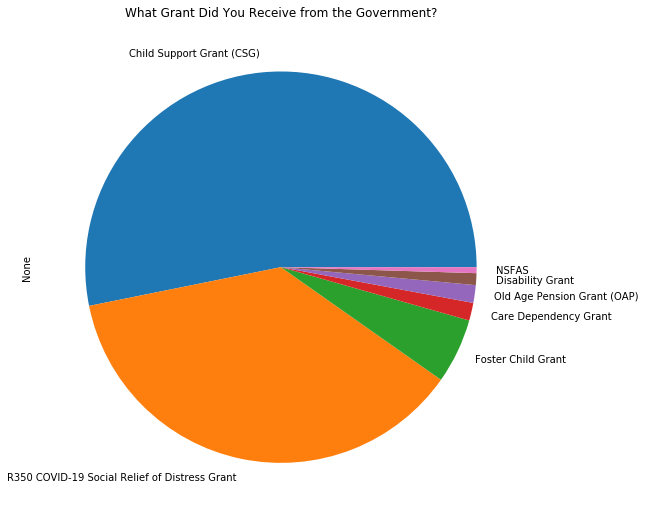

In [267]:
#Grant received in October
df['w3_nc_incgov_oct'] = df['w3_nc_incgov_oct'].apply(replace)
df = df[df['w3_nc_incgov_oct'].notna()]
df_grant_Oct = df['w3_nc_incgov_oct'].value_counts() #Get the count of people that responded to the question.
print("Did You Personally Receive Any kind of Government Grant in October?")
display(df_grant_Oct)
df_grant_Oct = df['w3_nc_incgov_oct'].value_counts()/df_grant_Oct.sum()
plt.figure(figsize=(8,6))
df_grant_Oct.plot(kind='bar');
plt.title("Did You Personally Receive Any kind of Government Grant in October?");
plt.xlabel("Response"); plt.ylabel("Proportion")


# Kind of grants received in June
df_grant1 = df['w3_nc_incgovtyp1'];df_grant2 = df['w3_nc_incgovtyp2'];
df_grant3 = df['w3_nc_incgovtyp3'];df_grant4 = df['w3_nc_incgovtyp4'];
df_grant = df_grant1.append(df_grant2).append(df_grant3).append(df_grant4)
df_grant = df_grant.apply(replace)
df_grant.notna();
df_grant = df_grant.value_counts() #Get the count of people that responded to the question.
print('What Grant Did You Receive from the Government?')
display(df_grant)
plt.figure(figsize=(10,9))
df_grant.plot(kind='pie');
plt.title("What Grant Did You Receive from the Government?");

Participants that received grants from the government remained roughly the same. COVID-19 Social Relief of Distress Grant increased by 10%. Everything roughly stayed the same grants wise. 

Let's have a look at how the participant's primary source of income was affected during the third wave.

What Was Your Primary Source of Income in June?


Government grants                     279
Income from employment                 58
Money from friends or family           48
Pension                                25
Household had no income in October     16
Income from a business                  7
Other (specify)                         3
dtype: int64

In the Past 4 weeks, How Has This Main Income Source Changed?


Decreased          167
Stayed the same    146
Increased           19
Name: w3_nc_hhincchnged, dtype: int64

Text(0, 0.5, 'Proportion')

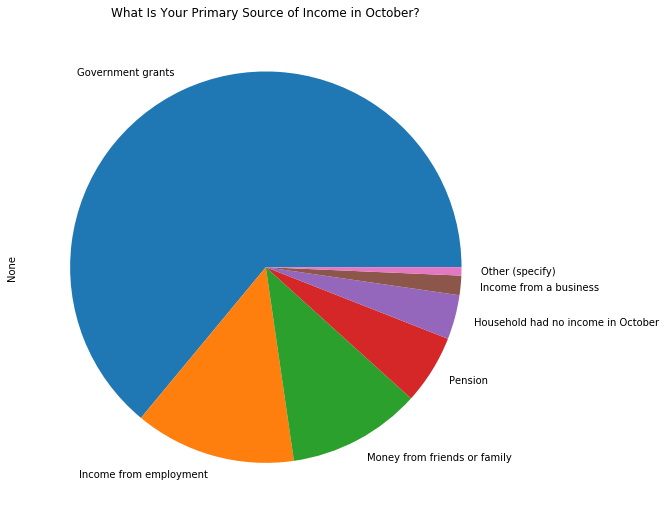

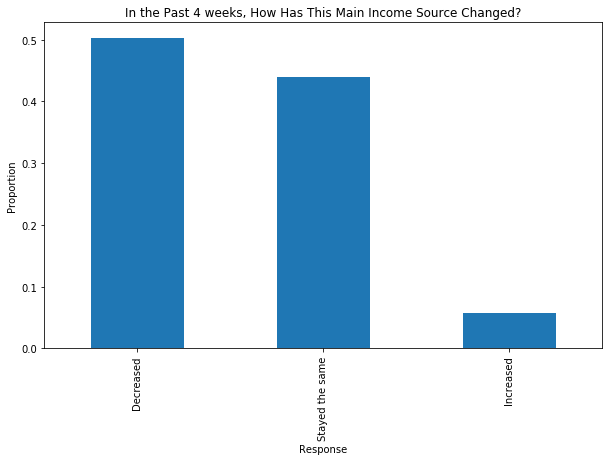

In [268]:
# Source of Income
df_src_income1 = df['w3_nc_hhincsrc1']; df_src_income2 = df['w3_nc_hhincsrc2']; 
df_src_income3 = df['w3_nc_hhincsrc3']; df_src_income4 = df['w3_nc_hhincsrc4'];
df_src_income = df_src_income1.append(df_src_income2).append(df_src_income3).append(df_src_income4)
df_src_income = df_src_income.apply(replace)
df_src_income.notna();
df_src_income = df_src_income.value_counts() #Get the count of people that responded to the question.
print('What Was Your Primary Source of Income in June?')
display(df_src_income)
plt.figure(figsize=(10,9))
df_src_income.plot(kind='pie');
plt.title("What Is Your Primary Source of Income in October?");

#Change in Source of Income
df['w3_nc_hhincchnged'] = df['w3_nc_hhincchnged'].apply(replace); 
df = df[df['w3_nc_hhincchnged'].notna()]
df_decrease = df['w3_nc_hhincchnged'].value_counts() #Get the count of people that responded to the question.
print('In the Past 4 weeks, How Has This Main Income Source Changed?')
display(df_decrease)
df_decrease = df['w3_nc_hhincchnged'].value_counts()/df_decrease.sum()
plt.figure(figsize=(10,6))
df_decrease.plot(kind='bar');
plt.title("In the Past 4 weeks, How Has This Main Income Source Changed?");
plt.xlabel("Response"); plt.ylabel("Proportion")

Participant's reliance on government grants remains mostly unchanged at 62%. Income from employment remains momstly unchanged at 13%. In addition, 50% of participant's incomes decreased during the third wave. 